# Conecting to housing_data_db

In [2]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [3]:
# Create engine using database file
engine = create_engine("sqlite:///housing_data.sqlite")

In [4]:
# Declare a Base using `automap_base()`
Base = automap_base()

In [5]:
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [6]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['Features', 'Location', 'Target']

In [7]:
# Assign the Target class to a variable called 'target' and features to feature
target = Base.classes.Target
features = Base.classes.Features

In [8]:
# Create a session
session = Session(engine)

In [9]:
# Query all sales prices
results = session.query(target.index, target.sale_prc).all()

In [10]:
#convert to list, remove first row, which displays the column headers
prices = list(results)
prices.pop(0)
prices

[(0, 440000.0),
 (1, 349000.0),
 (2, 800000.0),
 (3, 988000.0),
 (4, 755000.0),
 (5, 630000.0),
 (6, 1020000.0),
 (7, 850000.0),
 (8, 250000.0),
 (9, 1220000.0),
 (10, 1160000.0),
 (11, 260000.0),
 (12, 178000.0),
 (13, 250000.0),
 (14, 913500.0),
 (15, 159000.0),
 (16, 199000.0),
 (17, 590000.0),
 (18, 450000.0),
 (19, 1870000.0),
 (20, 1067300.0),
 (21, 1056000.0),
 (22, 900000.0),
 (23, 1015000.0),
 (24, 1235000.0),
 (25, 1587500.0),
 (26, 1265000.0),
 (27, 2450000.0),
 (28, 980000.0),
 (29, 1130000.0),
 (30, 1340000.0),
 (31, 1200000.0),
 (32, 1550000.0),
 (33, 1020000.0),
 (34, 975000.0),
 (35, 950000.0),
 (36, 1675000.0),
 (37, 120000.0),
 (38, 73000.0),
 (39, 86500.0),
 (40, 99300.0),
 (41, 1604000.0),
 (42, 1225000.0),
 (43, 1830000.0),
 (44, 1900000.0),
 (45, 1100000.0),
 (46, 1375000.0),
 (47, 1425000.0),
 (48, 1270000.0),
 (49, 1250000.0),
 (50, 1300000.0),
 (51, 1200000.0),
 (52, 2100000.0),
 (53, 900000.0),
 (54, 715000.0),
 (55, 1600000.0),
 (56, 1550000.0),
 (57, 1650000

In [11]:
target_df = pd.DataFrame(prices, columns=['index','SALE_PRC']).set_index('index')

In [12]:
target_df

,SALE_PRC
index,
0,440000.0
1,349000.0
2,800000.0
3,988000.0
4,755000.0
...,...
13927,275000.0
13928,340000.0
13929,287500.0


In [13]:
results = session.query(features.index, features.land_sqfoot, features.tot_living_area, features.spec_feat_val, features.rail_dist, features.ocean_dist, features.water_dist, features.cntr_dist, features.subcntr_dist, features.hwy_dist, features.structure_age, features.avno60plus, features.month_sold, features.structure_quality, features.latitude_group, features.longitude_group).all()

In [14]:
feature_list = list(results)
columns_list = feature_list[0]
feature_list.pop(0)
feature_list

[(0, 9375.0, 1753.0, 0.0, 2815.9, 12811.4, 347.6, 42815.3, 37742.2, 15954.9, 67.0, 0.0, 8.0, 4.0, 7.0, 8.0),
 (1, 9375.0, 1715.0, 0.0, 4359.1, 10648.4, 337.8, 43504.9, 37340.5, 18125.0, 63.0, 0.0, 9.0, 4.0, 7.0, 8.0),
 (2, 9375.0, 2276.0, 49206.0, 4412.9, 10574.1, 297.1, 43530.4, 37328.7, 18200.5, 61.0, 0.0, 2.0, 4.0, 7.0, 8.0),
 (3, 12450.0, 2058.0, 10033.0, 4585.0, 10156.5, 0.0, 43797.5, 37423.2, 18514.4, 63.0, 0.0, 9.0, 4.0, 7.0, 8.0),
 (4, 12800.0, 1684.0, 16681.0, 4063.4, 10836.8, 326.6, 43599.7, 37550.8, 17903.4, 42.0, 0.0, 7.0, 4.0, 7.0, 8.0),
 (5, 9900.0, 1531.0, 2978.0, 2391.4, 13017.0, 188.9, 43135.1, 38176.2, 15687.2, 41.0, 0.0, 2.0, 4.0, 7.0, 8.0),
 (6, 10387.0, 1753.0, 23116.0, 3277.4, 11667.8, 0.0, 43598.7, 37973.9, 17068.2, 63.0, 0.0, 2.0, 5.0, 7.0, 8.0),
 (7, 10272.0, 1663.0, 34933.0, 3112.4, 11718.1, 10.5, 43780.8, 38198.3, 16989.9, 21.0, 0.0, 9.0, 4.0, 7.0, 8.0),
 (8, 9375.0, 1493.0, 11668.0, 2081.8, 13043.8, 51.5, 43481.7, 38542.0, 15623.3, 56.0, 0.0, 3.0, 4.0, 7.0, 

In [15]:
feature_df = pd.DataFrame(feature_list, columns=columns_list).set_index('index')

In [16]:
feature_df

,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,STRUCTURE_AGE,avno60plus,month_sold,structure_quality,latitude_group,longitude_group
index,,,,,,,,,,,,,,,
0,9375.0,1753.0,0.0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67.0,0.0,8.0,4.0,7.0,8.0
1,9375.0,1715.0,0.0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63.0,0.0,9.0,4.0,7.0,8.0
2,9375.0,2276.0,49206.0,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61.0,0.0,2.0,4.0,7.0,8.0
3,12450.0,2058.0,10033.0,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63.0,0.0,9.0,4.0,7.0,8.0
4,12800.0,1684.0,16681.0,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42.0,0.0,7.0,4.0,7.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13927,6780.0,967.0,6580.0,3844.5,20568.0,3252.4,22175.9,12150.1,917.4,16.0,0.0,4.0,4.0,6.0,6.0
13928,7500.0,1854.0,2544.0,3593.6,20791.9,3077.7,22375.1,12316.8,738.2,26.0,0.0,5.0,4.0,6.0,6.0
13929,8460.0,1271.0,2064.0,4143.2,20307.9,3588.4,20966.9,12433.0,743.7,16.0,0.0,7.0,4.0,6.0,6.0


In [17]:
# feature_df is X, target_df is y
X = feature_df
y = target_df

# Create a linear model
model = LinearRegression()

In [18]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [19]:
# Fit (train) our model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [20]:
model.score(X_test, y_test)

0.6851435614036954

In [21]:
# Calculate feature importance in the Random Forest model.
clf = RandomForestClassifier(random_state=1, n_estimators=50).fit(X_train, y_train)
print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Testing Score: {clf.score(X_test, y_test)}')

C:\Users\bmac9\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Training Score: 0.9993300794334387
Testing Score: 0.028136663795578526


In [22]:
feature_importances = clf.feature_importances_

In [23]:
%matplotlib inline
from matplotlib import pyplot as plt

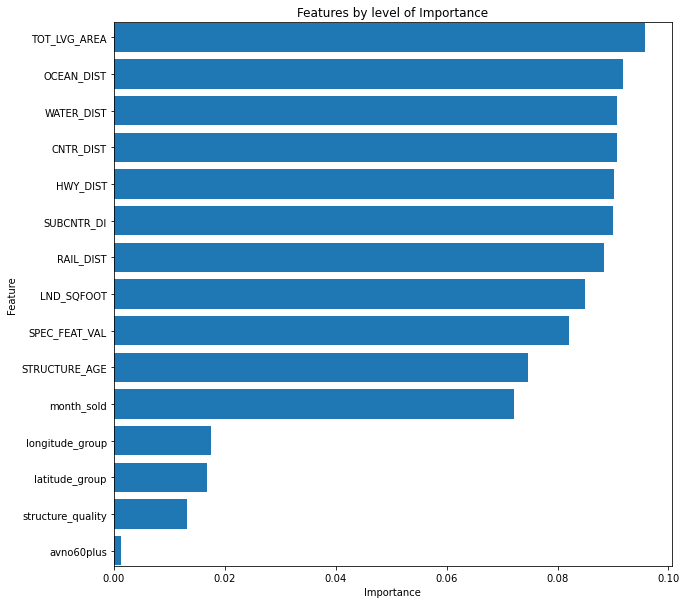

In [27]:
features = sorted(zip(X.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,10)
plt.margins(y=0.001)
ax.set_title('Features by level of Importance')
ax.set_xlabel('Importance')
ax.set_ylabel('Feature')

ax.barh(y=cols, width=width)

plt.savefig('feature_import.png')

plt.show()

In [ ]:
y_pred = model.predict(X_test)
y_pred

In [ ]:
X_test['predicted_price'] = y_pred

In [ ]:
comparison_pd = pd.merge(X_test, y_test, on="index")

In [ ]:
comparison_pd[['predicted_price','SALE_PRC']]

In [ ]:
plt.plot('predicted_price', 'SALE_PRC', 'o', data=comparison_pd)
